In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [10]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
scaler = StandardScaler()

In [12]:
x_trf = scaler.fit_transform(x)

In [13]:
x_trf[0:6]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966]])

In [14]:
x.shape

(768, 8)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_trf,y,test_size = 0.2)

In [16]:
x_train.shape

(614, 8)

In [79]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [80]:

model = Sequential()

model.add(Dense(64,activation = 'relu',input_dim= 8))
model.add(BatchNormalization())
model.add(Dense(32,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(4,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))

In [81]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy',metrics = 'accuracy')

In [82]:
history = model.fit(x_train,y_train,epochs=100,validation_data = (x_test,y_test))

Epoch 1/100
20/20 [==============================] - 3s 17ms/step - loss: 0.6415 - accuracy: 0.6384 - val_loss: 0.6292 - val_accuracy: 0.7662
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5643 - accuracy: 0.7003 - val_loss: 0.5974 - val_accuracy: 0.7597
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5454 - accuracy: 0.7345 - val_loss: 0.5739 - val_accuracy: 0.7727
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5283 - accuracy: 0.7313 - val_loss: 0.5531 - val_accuracy: 0.7987
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5123 - accuracy: 0.7590 - val_loss: 0.5390 - val_accuracy: 0.8117
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4998 - accuracy: 0.7606 - val_loss: 0.5275 - val_accuracy: 0.8117
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4866 - accuracy: 0.7606 - val_loss: 0.5195 - val_accuracy: 0.7922
Epoch 8/100

In [53]:
# callback = keras.callbacks.EarlyStopping(
#     monitor = 'val_loss',
#     min_delta=0,
#     patience=3,
#     verbose=1,
#     mode="min",
#     baseline=None,
#     restore_best_weights=True,
#     start_from_epoch=0,
# )

In [21]:
import matplotlib.pyplot as plt


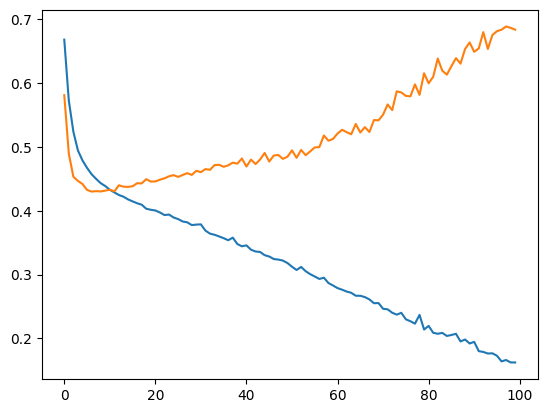

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


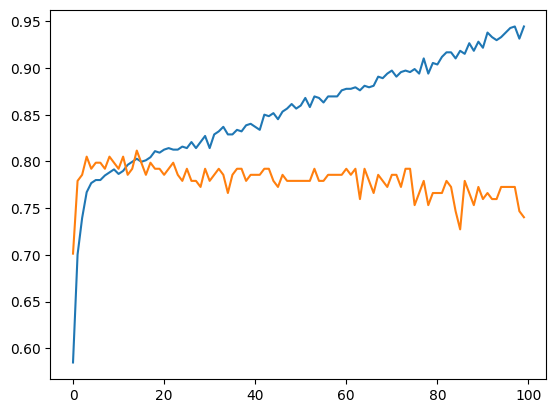

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

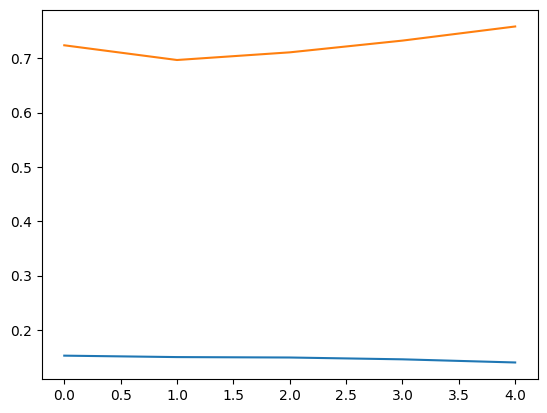

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# early stopping



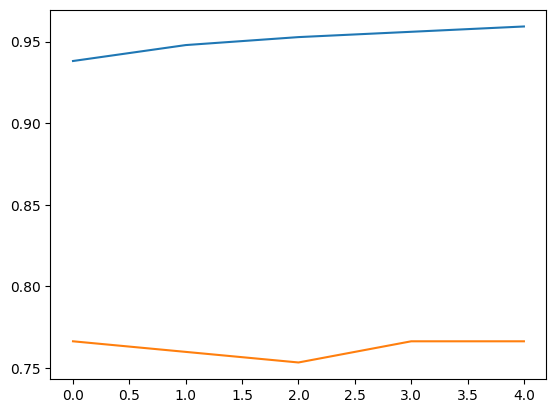

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# early stopping

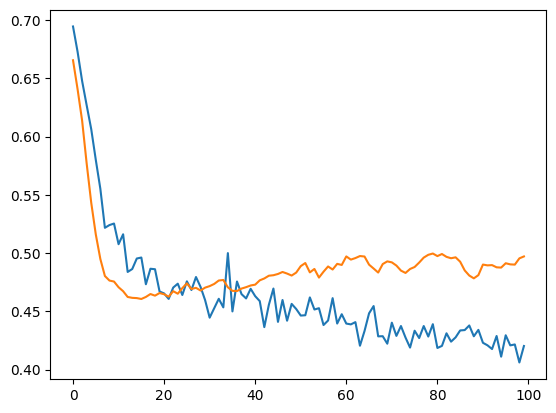

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# droupout

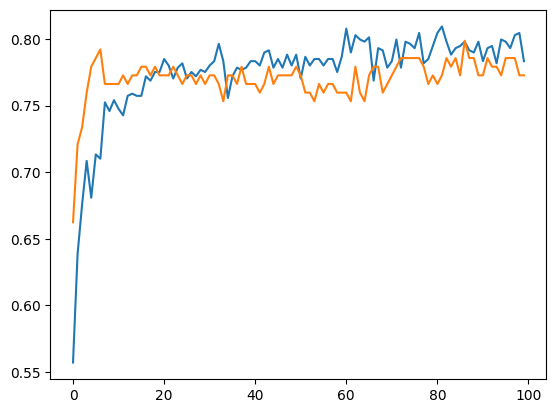

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# dropout

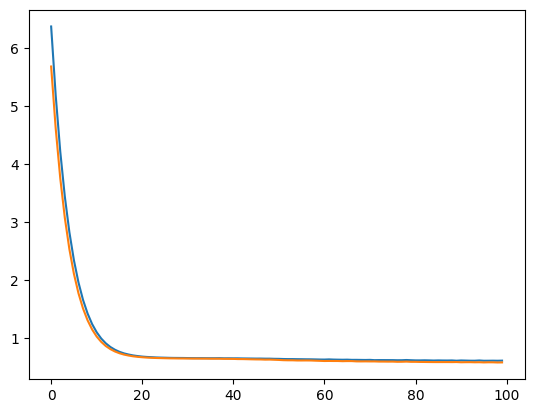

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#l2

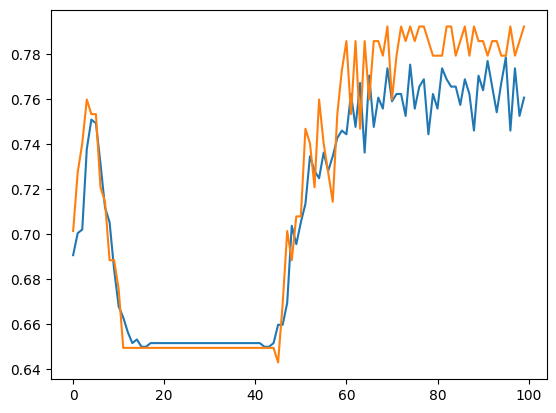

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#l2

In [86]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.2 MB/s eta 0:00:00


In [87]:
import kerastuner as kt

<ipython-input-87-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [89]:
def build_models(hp):
  model = Sequential()

  model.add(Dense(hp.Int('num_nodes', min_value = 8,max_value = 128,step = 8),input_dim = 8,activation = hp.Choice('activation', values = ['relu','sigmoid','tanh'])))
  model.add(Dropout(hp.Choice('num',values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))

  for i in range(hp.Int('num_layers', min_value =1 , max_value=10)):
    model.add(Dense(hp.Int('num_nodes'+str(i), min_value = 8,max_value = 128,step = 8),activation = hp.Choice('activation'+str(i), values = ['relu','sigmoid','tanh'])))
    model.add(Dropout(hp.Choice('num'+str(i),values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
  model.add(Dense(1,activation ='sigmoid'))

  model.compile(optimizer = hp.Choice('optimizer',values  = ['Adam','rmsprop','adagrad','sgd']),loss = 'binary_crossentropy',metrics = 'accuracy')

  return model


In [96]:
tuner = kt.GridSearch(build_models,objective = 'val_accuracy',max_trials = 10,directory ='mydir',project_name = 'first')

In [97]:
tuner.search(x_train,y_train,epochs=50,validation_data = (x_test,y_test))

Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.7792207598686218

Best val_accuracy So Far: 0.8311688303947449
Total elapsed time: 00h 01m 25s


In [101]:
tuner.get_best_hyperparameters()[0].values

{'num_nodes': 8,
 'activation': 'relu',
 'num': 0.1,
 'num_layers': 1,
 'num_nodes0': 8,
 'activation0': 'relu',
 'num0': 0.2,
 'optimizer': 'Adam'}

In [104]:
model = tuner.get_best_models(num_models=1)[0]

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [107]:
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
20/20 [==============================] - 3s 14ms/step - loss: 0.5177 - accuracy: 0.7248 - val_loss: 0.4702 - val_accuracy: 0.8312
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5051 - accuracy: 0.7655 - val_loss: 0.4682 - val_accuracy: 0.8312
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.7378 - val_loss: 0.4698 - val_accuracy: 0.8247
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5056 - accuracy: 0.7427 - val_loss: 0.4697 - val_accuracy: 0.8117
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5169 - accuracy: 0.7296 - val_loss: 0.4685 - val_accuracy: 0.8182
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5107 - accuracy: 0.7476 - val_loss: 0.4676 - val_accuracy: 0.8312
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4943 - accuracy: 0.7573 - val_loss: 0.4665 - val_accuracy: 0.8312
Epoch 8/100


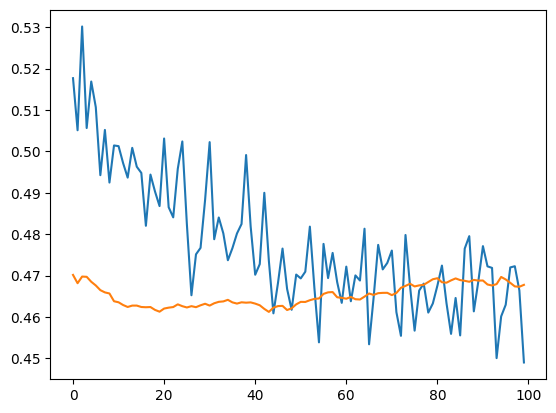

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

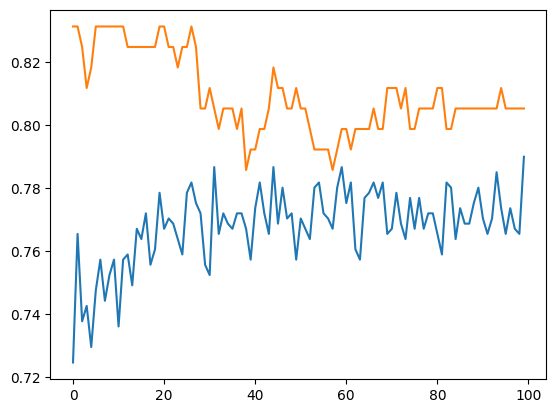

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])